# Basic Data Cleaning Before Filtering

This is a data cleaning performed on the real estate market trends in Conneticut. 


The raw data file was obtained from https://catalog.data.gov/dataset/real-estate-sales-2001-2018. On the wbsite, the file is described to include

>town, property address, date of sale, property type (residential, apartment, commercial, industrial or vacant land), sales price, and property assessment. 

>Annual real estate sales are reported by grand list year (October 1 through September 30 each year). For instance, sales from 2018 GL are from 10/01/2018 through 9/30/2019 (Data.gov).


Frequently used libraries are imported:

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [18]:
#Dataset imported
real_estate = pd.read_csv('../Datasets/Real_Estate_Sales_2001-2020_GL.csv')
#Reset Index
real_estate.reset_index(drop=True)

/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_3280/2421691908.py:2: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv('../Datasets/Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


In [19]:
def extract_street_number(address):
    """
    Extracts the street number from the given address using a regular expression.
    
    Args:
        address (str or None): The address string.
        
    Returns:
        str or None: The extracted street number or None if not found.
    """
    if pd.notnull(address):
        address = str(address)
        number_finder = r'^\d+'
        street_number = re.search(number_finder, address)
        if street_number:
            return street_number.group()
    return None

In [20]:
def extract_street_name(address):
    """
    Extracts and processes the street name from an address.

    Args:
        address (str or None): The address string.

    Returns:
        str or None: The extracted street name or None if not found.
    """
    if pd.notnull(address):
        address = str(address)

        # Convert the entire address to lowercase
        address = address.lower()

        # Remove unit numbers from the address
        address_without_units = re.sub(r'\b(?:unit|suite|apt|apartment|#|-)\b\s*[\w\d-]+', '', address)

        # Find the street number
        number_finder = r'^\d+'
        street_number = re.search(number_finder, address_without_units)

        if street_number:
            # Remove the street number from the address
            address_without_number = re.sub(number_finder, '', address_without_units).strip()

            # Capitalize the first letter of each word in the address without the number
            street_name = address_without_number.title()

            # Replace abbreviations with full words
            street_name = re.sub(r'\bst\b', 'street', street_name)

            return street_name
    return None

In [21]:
real_estate["Full Address"] = real_estate["Address"].apply(extract_street_number) + ", " + real_estate["Address"].apply(extract_street_name) + ", " + real_estate["Town"]
real_estate.sample(20)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address
721212,141369,2014,07/23/2015,Stamford,269 WEST TRAIL,628550.0,740500.0,0.848818,Single Family,Single Family,NaN,NaN,NaN,NaN,"269, West Trail, Stamford"
256297,41133,2004,01/18/2005,Bridgeport,431 BIRMINGHAM ST,105211.0,180000.0,0.584506,NaN,NaN,NaN,NaN,NaN,POINT (-73.21421 41.20738),"431, Birmingham St, Bridgeport"
254900,30419,2003,06/28/2004,Stonington,302 FLANDERS RD,164400.0,700000.0,0.234857,NaN,NaN,7.0,NaN,NaN,NaN,"302, Flanders Rd, Stonington"
173551,20414,2002,01/10/2003,Meriden,8 PRESCOTT ST,58310.0,148900.0,0.391605,NaN,NaN,NaN,NaN,NaN,NaN,"8, Prescott St, Meriden"
89547,10094,2001,04/15/2002,Lebanon,CONGDON RD,32030.0,65000.0,0.492769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560136,10313,2010,06/09/2011,Glastonbury,134 OLD FARMS RD,331100.0,480000.0,0.689792,Single Family,Single Family,NaN,NaN,NaN,NaN,"134, Old Farms Rd, Glastonbury"
264241,30054,2003,11/12/2003,Wolcott,28 DEVONSHIRE RD,90790.0,126384.0,0.718366,NaN,NaN,NaN,NaN,NaN,NaN,"28, Devonshire Rd, Wolcott"
763477,150298,2015,08/01/2016,Avon,25 SAXON WOODS,464510.0,655650.0,0.708473,Single Family,Single Family,NaN,NaN,NaN,NaN,"25, Saxon Woods, Avon"
892150,18112,2018,07/19/2019,Durham,11 DAWN TRAIL,272650.0,430000.0,0.634000,Single Family,Single Family,NaN,NaN,NaN,NaN,"11, Dawn Trail, Durham"
610667,110075,2011,01/03/2012,New Milford,16 SUNNY VALLEY RD,165340.0,300000.0,0.551133,NaN,NaN,25 - Other,SALES RATIO,NaN,NaN,"16, Sunny Valley Rd, New Milford"


Since the columnn `location` is in a string datatype in `POINT (XX.XXXXXX, XX.XXXXX)` format, it will be divided into two columns of the float datatype. 

First, use Regular Expression to find the two floats that might be negative.

In [22]:
def extract_coordinates(location):
    if isinstance(location, str):
        match = re.search(r'\((-?\d+\.\d+)\s(-?\d+\.\d+)\)', location)
        if match:
            return match
    return None


def extract_latitude(coordinates):
    if coordinates is not None:
        return coordinates[1]
    return None

def extract_longitude(coordinates):
    if coordinates is not None:
        return coordinates[2]
    return None


##### Explanation of the regex search:
- `re.search`` matches the characters search literally (case sensitive)

This regex Capturing Group is repeated twice to find the coordinats in the string column of `location`: 
> \((-?\d+\.\d+)\s <

- `?` matches the previous token (which is `-`) between zero and one times, as many times as possible, giving back as needed (greedy). As a result, it preserves the minus sign, indicating that the number could be negative.
- `\d` matches a digit (equivalent to [0-9])
- `+` matches the previous token (which is a digit) between one and unlimited times, as many times as possible, giving back as needed (greedy). As a result, it preserves all the digits.
- `\.` matches the character which the period `.`
- `\d` matches a digit (equivalent to [0-9])
- `+` matches the previous token (which is a digit) between one and unlimited times, as many times as possible, giving back as needed (greedy)
- `\s` matches any whitespace character.

Reference: Used the built-in explanation on https://regex101.com.


In [23]:
real_estate['coordinates'] = real_estate['Location'].apply(extract_coordinates)
real_estate['latitude'] = real_estate['coordinates'].apply(extract_latitude)
real_estate['longitude'] = real_estate['coordinates'].apply(extract_longitude)
real_estate = real_estate.drop(['coordinates'], axis=1)
real_estate['latitude'] = real_estate['latitude'].astype(float)
real_estate['longitude'] = real_estate['longitude'].astype(float)

In [24]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
 14  Full Address      970520 non-null  object 
 15  latitude          197696 non-null  float64
 16  longitude         19

From this output, it is evident that `latitude` and `longitude` columns have the successfully extracted coordinates.

<Axes: xlabel='List Year', ylabel='Sale Amount'>

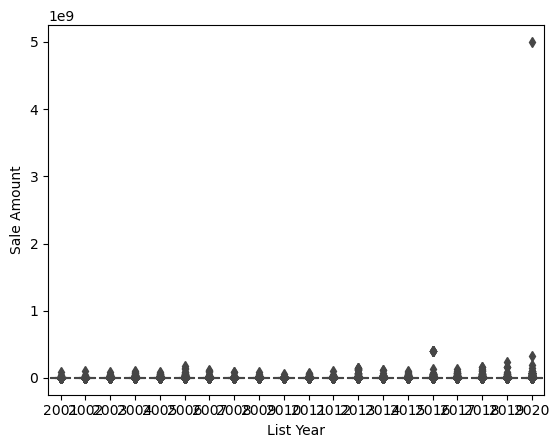

In [25]:
sns.boxplot(x='List Year', y='Sale Amount', data=real_estate)

In [26]:
print(real_estate[real_estate['Sale Amount'] == real_estate['Sale Amount'].max()])

       Serial Number  List Year Date Recorded        Town           Address  \
59835       20200091       2020    08/19/2021  Willington  456 TOLLAND TPKE   

       Assessed Value   Sale Amount  Sales Ratio Property Type  \
59835       2238530.0  5.000000e+09     0.000448    Apartments   

      Residential Type Non Use Code       Assessor Remarks  \
59835              NaN   25 - Other  APARTMENTS-COMMERICAL   

                OPM remarks Location                   Full Address  latitude  \
59835  INCORRECT SALE PRICE      NaN  456, Tolland Tpke, Willington       NaN   

       longitude  
59835        NaN  


In the `OPM remarks`, it is stated that an *INCORRECT SALE PRICE* is inserted. So this row will be deleted and will investigate if other rows have the same comment.

In [27]:

search_string = "INCORRECT"

# Filter rows that contain the search string, including missing values
matching_rows = real_estate[real_estate['OPM remarks'].str.contains(search_string, na=False)]

matching_rows

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address,latitude,longitude
981,200562,2020,02/03/2021,Danbury,19 MILL RD,263600.0,4.150000e+05,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),"19, Mill Rd, Danbury",-73.53692,41.38822
5006,200151,2020,12/21/2020,Guilford,33 INDIAN COVE RD,241200.0,9.200000e+05,0.262174,Residential,Single Family,07 - Change in Property,NaN,19x8 AREA OF TOWN SKETCH IS INCORRECT PER MLS ...,POINT (-72.68572 41.25516),"33, Indian Cove Rd, Guilford",-72.68572,41.25516
13081,201166,2020,08/31/2021,Hartford,255 MARTIN ST,61226.0,2.050000e+05,0.298663,Residential,Single Family,25 - Other,NaN,INCORRECT ADDRESS - SEE SALE #201140,NaN,"255, Martin St, Hartford",NaN,NaN
23728,200920,2020,05/10/2021,Danbury,42 BRENTWOOD CI,278800.0,5.300000e+05,0.526038,Residential,Condo,25 - Other,B16001-170,INCORRECT ADDRESS? - ALSO SEE #200710,POINT (-72.85037 41.44558),"42, Brentwood Ci, Danbury",-72.85037,41.44558
25599,200471,2020,01/20/2021,Manchester,14 SUMMIT STREET,120400.0,8.850000e+04,1.360452,Residential,Two Family,25 - Other,NaN,TOWN SKETCH INCORRECT - REAR ENCLOSED PORCH IS...,NaN,"14, Summit Street, Manchester",NaN,NaN
59835,20200091,2020,08/19/2021,Willington,456 TOLLAND TPKE,2238530.0,5.000000e+09,0.000448,Apartments,NaN,25 - Other,APARTMENTS-COMMERICAL,INCORRECT SALE PRICE,NaN,"456, Tolland Tpke, Willington",NaN,NaN
60894,20200078,2020,07/06/2021,Willington,224 RIVER ROAD,223070.0,3.187900e+08,0.000700,Residential,Single Family,25 - Other,COLONIAL,INCORRECT SALE PRICE - NO MLS,POINT (-72.30341 41.86603),"224, River Road, Willington",-72.30341,41.86603
65620,20200102,2020,09/28/2021,Willington,7 TOLLAND TURNPIKE ROAD,112040.0,1.941491e+08,0.000577,Residential,Three Family,25 - Other,MULTI FAMILY,INCORRECT SALE PRICE,NaN,"7, Tolland Turnpike Road, Willington",NaN,NaN
816742,160251,2016,12/08/2016,Waterbury,101 MADELINE AVE #16,776240.0,1.300000e+05,5.971077,Condo,Condo,25 - Other,NaN,ASSESSMENT INCORRECT,NaN,"101, Madeline Ave #16, Waterbury",NaN,NaN
830164,17350,2017,02/21/2018,Hartford,463 ALBANY AV,53760.0,6.350000e+04,0.846614,Single Family,Single Family,14 - Foreclosure,Foreclosure related sale,ADDRESS IS INCORRECT,NaN,"463, Albany Av, Hartford",NaN,NaN


In [28]:
# Filter rows for incorrect_real_estate where 'OPM remarks' do not contain the search string
correct_real_estate = real_estate[~real_estate['OPM remarks'].str.contains(search_string, na=False)]
correct_real_estate

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address,latitude,longitude
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN,"230, Wakelee Ave, Ansonia",NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN,"390, Turnpike Rd, Ashford",NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN,"5, Chestnut Drive, Avon",NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN,"111, Northington Drive, Avon",NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN,"70, Far Hills Drive, Avon",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN,"4, Bishop Ct, New London",NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN,"126, Perkins Ave, Waterbury",NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN,"19, Hathaway St, Windsor Locks",NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN,"8, Bystrek Dr, Middletown",NaN,NaN


In [29]:
correct_real_estate.to_csv('../Datasets/correct_real_estate.csv')